In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data/wine_data.csv',header=None,usecols=[0,1,2]);
df.columns=['class label','alcohol','malic acid'];

In [ ]:
df

,class label,alcohol,malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='alcohol', ylabel='Density'>

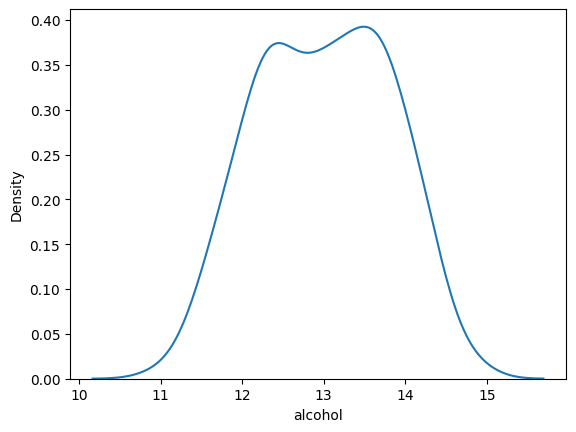

In [ ]:
sns.kdeplot(df['alcohol'])

<Axes: xlabel='malic acid', ylabel='Density'>

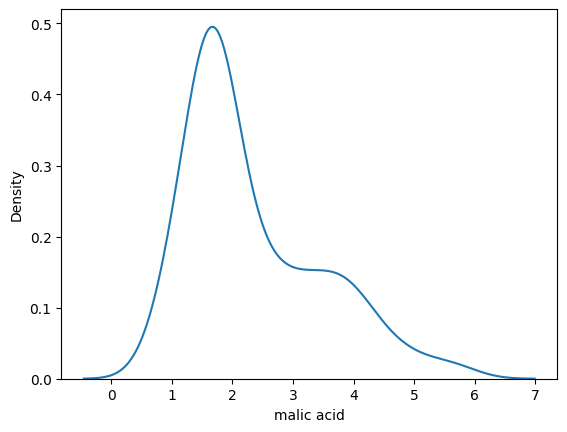

In [ ]:
sns.kdeplot(df['malic acid'])

<Axes: xlabel='alcohol', ylabel='malic acid'>

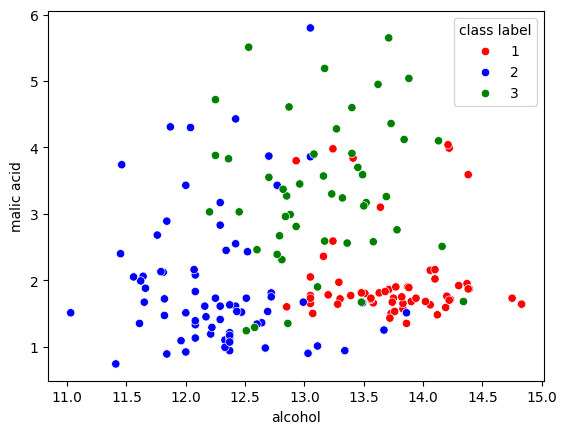

In [ ]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x="alcohol", y="malic acid", hue="class label", palette=color_dict, data=df)

TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(['class label'],axis=1),df['class label'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
np.round(X_train.describe(),1)

,alcohol,malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [ ]:
np.round(X_train_scaled.describe(),1)

,alcohol,malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


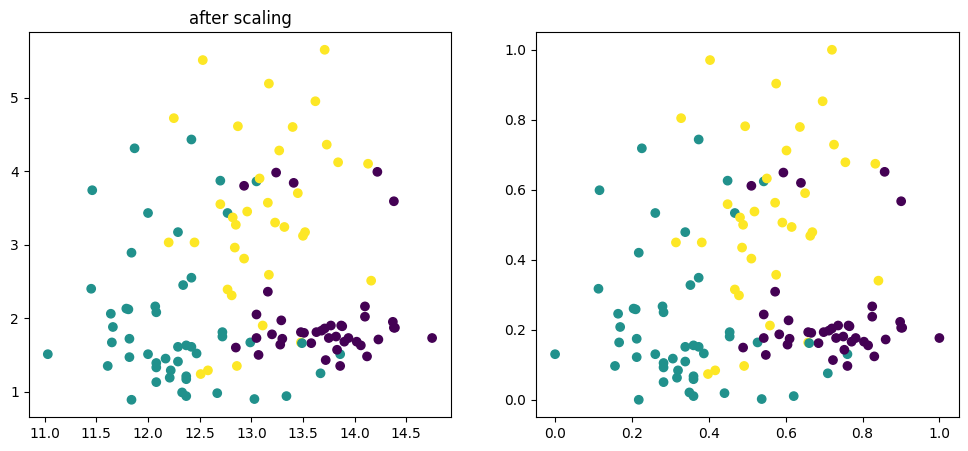

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['alcohol'],X_train['malic acid'],c=y_train)
ax1.set_title("before scaling")
ax2.scatter(X_train_scaled['alcohol'],X_train_scaled['malic acid'],c=y_train)
ax1.set_title("after scaling")
plt.show()

<Axes: xlabel='alcohol', ylabel='Density'>

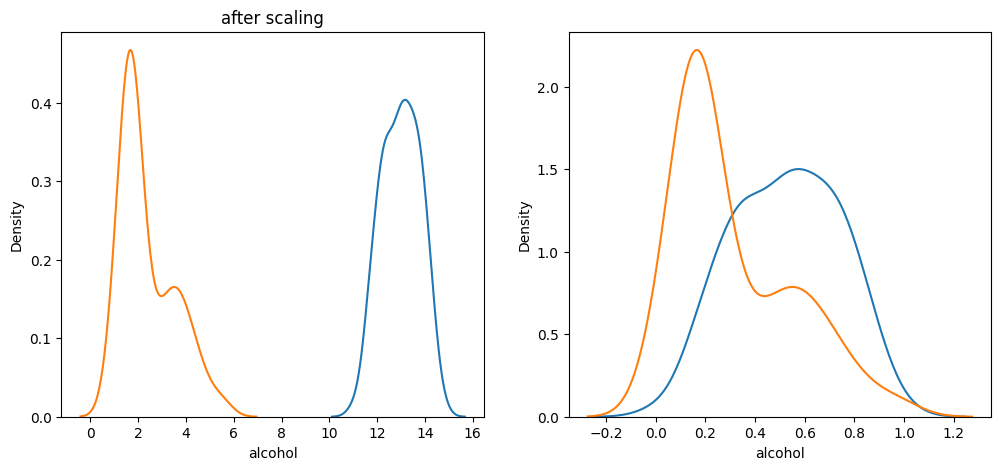

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title("before scaling")
sns.kdeplot(X_train['alcohol'],ax=ax1)
sns.kdeplot(X_train['malic acid'],ax=ax1)

#after scaling
ax1.set_title("after scaling")
sns.kdeplot(X_train_scaled['alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['malic acid'],ax=ax2)
